# Artificial Visual Imagination 
## Text to Image with BigGAN + CLIP + CMA-ES

---
Based off of WanderCLIP [j.mp/wanderclip](j.mp/wanderclip) by Eyal Gruss [@eyaler](https://twitter.com/eyaler) [eyalgruss.com](https://eyalgruss.com)

Modified to run on nautilus.optiputer.net by robert.twomey@gmail.com

# Start Here, Then Run All

Results show up in `/work/results/` in the file browser at left

In [1]:
# prompts = [
#     'sculpture television buddha',
#     'television buddha sculpture with grass',
#     'a buddha sculpture with television in the grass',
#     'old television in grass with buddha sculpture by pacific ocean',
#     'old television in long grass with buddha sculpture by pacific ocean'
# ]

# prompts = [
#     'a photo of wild tarragon',
#     'a drawing of wild tarragon, a tasteless plant',
#     'a painting of farm hands, a kind of laborer',
#     'a painting of a farmer’s hands',
#     'a self-portrait of Artemisia Gentileschi, artist',
#     'artemisia Gentileschi is a dragon',
#     'a painting of Artemisia Gentileschi as a dragon',
#     'a photo of the dragon Artemisia Gentileschi',
#     'a portrait of artist as dragon',
#     'a drawing of a dragon',
#     'a painting of uprooted rhizome as a dragon',
#     'a sketch of a rhizome, uprooted',
#     'an image of a plant rising',
#     'a drawing of plant roots and mycorrhizal fungi',
#     'an image of growing wiser',
#     'a painting of wise plants',
#     'a drawing of plant wisdom',
#     'a photo of a plant hiding',
#     'a drawing of hiding from elders',
#     'a painting of Susanna and the Elders',
#     'an image of creeps',
#     'a painting of gazing creeps',
#     'a painting of groping creeps',
#     'a painting of invasive elders',
#     'a photo of perverse hope',
#     'a painting of your hatred',
#     'a drawing of killing a mosquito',
#     'a painting of a mosquito, a kind of corpse',
#     'a drawing of malaria',
#     'a sketch of salted fields',
#     'a photo of dancers',
#     'a painting of dancers in a field',
#     'an image of your spit',
#     'a photo of standing too close',
#     'a painting of someone standing too close',
#     'a drawing of an oak sapling',
#     'a painting of an oak in an empty field',
#     'a photo of growing',
#     'an image of growing wilder',
#     'a painting of growing stronger',
#     'a photo of a hand holding high',
#     'a painting of a hand holding the head of Holofernes',
#     'a painting of the head of Holofernes',
#     'a drawing of a head, blood-rooted',
#     'an image of a bloody root',
#     'a painting of autumn gold',
#     'a photo of a golden gown',
#     'an image of a mouth tasting',
#     'a sketch of a mouth',
#     'a drawing of taste',
#     'a painting of the taste of nothing',
#     'a photograph of being invisible',
#     'a drawing of your renown',
#     'a painting of a renowned artist',
#     'a portrait of the artist',
#     'a self-portrait of Artemisia Gentileschi as tarragon'
# ]

# prompts = [
#     'a photo of a front door',
#     'a picture of the mud room',
#     'a photo of the kitchen', 
#     'a photo of the livingroom with television', 
#     'a photo of a couch and a television', 
#     'a photo of a family on a couch', 
#     'a picture a kitchen', 
#     'a photo of food on the kitchen counter',
#     'a photo of a pie in the oven',
#     'a photo of a bathroom',
#     'a photo of the interior of a bathroom',
#     'a photo of a person in a shower', 
#     'a photo of person brushing their teeth',
#     'a picture of the interior of a bedroom',
#     'a picture of a person sleeping in a bed', 
#     'a photo of a sunrise through a window'
# ]

# prompts = [
#     "sunrise through a window",
#     "a cat in the refrigerator"
# ]

# prompts = [
#     "over my head, I see the bronze butterfly",
#     "asleep on the black trunk",
#     "blowing like a leaf in green shadow",   
#     "down the ravine behind the empty house",   
#     "the cowbells follow one another",   
#     "into the distances of the afternoon",   
#     "to my right",
#     "in a field of sunlight between two pines",   
#     "the droppings of last year’s horses",   
#     "blaze up into golden stones",
#     "I lean back, as the evening darkens and comes on",
#     "a chicken hawk floats over, looking for home",
#     "I have wasted my life"
# ]

# prompts = [
#     "Midway on our life's journey, I found myself",
#     "In dark woods, the right road lost",
#     "To tell About those woods is hard - so tangled and rough",
#     "And savage that thinking of it now, I feel",
#     "The old fear stirring: death is hardly more bitter.",
#     "And yet, to treat the good I found there as well",
#     "I'll tell what I saw, though how I came to enter",
#     "I cannot well say, being so full of sleep",
#     "Whatever moment it was I began to blunder",
#     "Off the true path. But when I came to stop",
#     "Below a hill that marked one end of the valley",
#     "That had pierced my heart with terror, I looked up",
#     "Toward the crest and saw its shoulders already",
#     "Mantled in rays of that bright planet that shows",
#     "The road to everyone, whatever our journey.",
#     "Then I could feel the terror begin to ease",
#     "That churned in my heart's lake all through the night.",
#     "As one still panting, ashore from dangerous seas",
#     "Looks back at the deep he has escaped, my thought",
#     "Returned, still fleeing, to regard that grim defile", 
#     "That never left any alive who stayed in it."
# ]

prompts = [
    # 001
#     "an elegant machine that learns to generate artificial images",
#     "the sublime experience of an iceberg",
#     "ice is a vastness of possibilities",
#     "the vastness of possibilities of water is not a spatial vastness"
    # 002
    "a drawing of an elegant machine",
    "a machine that learns to make images",
    "a drawing of a machine that learns to make images"
]

seed = 1#3#9
iterations = 40#100#40

# 1. Imports to start session

Imports:

In [2]:
# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
logging.basicConfig(level=logging.WARNING)

from pytorch_pretrained_biggan import BigGAN
# load BigGAN below
last_gen_model = None
# last_gen_model = 'biggan-deep-512'
# biggan_model = BigGAN.from_pretrained(last_gen_model).cuda().eval()

In [3]:
cd CLIP

/home/jovyan/work/visual-imagination/CLIP


In [4]:
import clip # load CLIP below
last_clip_model = None
# last_clip_model = 'ViT-B/32'
# perceptor, preprocess = clip.load(last_clip_model)

In [5]:
clip.available_models()

['RN50', 'ViT-B/32']

In [6]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# 2. Config

1. For **prompt** OpenAI suggest to use the template "A photo of a X." or "A photo of a X, a type of Y." [[paper]](https://cdn.openai.com/papers/Learning_Transferable_Visual_Models_From_Natural_Language_Supervision.pdf)
2. For **initial_class** you can either use free text or select a special option from the drop-down list.
3. Free text and 'From prompt' might fail to find an appropriate ImageNet class.
4. **seed**=0 means no seed.

In [7]:
# prompt = 'television buddha sculpture with grass'
# prompt = 'a buddha sculpture with television in the grass'
# prompt = 'buddha television grass'
# prompt = "a clean well-lighted place"
# prompt = "large bright white room fluorescent light"
# prompt = "a room with good lighting"

gen_model = 'biggan-deep' #@param ['biggan-deep', 'sigmoid']
size = '512' #@param [512, 256, 128] 
color = True #@param {type:'boolean'}
initial_class = 'Random mix' #@param ['From prompt', 'Random class', 'Random Dirichlet', 'Random mix', 'Random embeddings'] {allow-input: true}
optimize_class = True #@param {type:'boolean'}
class_smoothing = 0.1 #@param {type:'number'}
truncation = 1 #@param {type:'number'}
stochastic_truncation = False #@param {type:'boolean'}
optimizer = 'CMA-ES' #@param ['SGD','Adam','CMA-ES','CMA-ES+SGD','CMA-ES+Adam']
pop_size = 50 #@param {type:'integer'}
clip_model = 'ViT-B/32' #@param ['ViT-B/32','RN50']
augmentations =  64#@param {type:'integer'}
learning_rate =  0.1#@param {type:'number'}
standartization_loss =  0#@param {type:'number'}
minimum_entropy_loss = 0.0001 #@param {type:'number'}
embeddings_l2_loss = 0.0001 #@param {type:'number'}
total_variation_loss = 0.1 #@param {type:'number'}
save_every = 5 #@param {type:'integer'}
fps = 1 #@param {type:'number'}
freeze_secs = 0 #@param {type:'number'}

# iterations = 10 #@param {type:'integer'}
# seed =  0#@param {type:'number'}
# seed = 1

# 3. Generate

Imports and helpers: 

In [8]:
import numpy as np
import torch
import torchvision
import sys
import imageio
from IPython.display import HTML, Image, clear_output
from scipy.stats import truncnorm, dirichlet
from pytorch_pretrained_biggan import BigGAN, convert_to_images, one_hot_from_names, utils
from nltk.corpus import wordnet as wn
#from base64 import b64encode
from time import time
import datetime

In [9]:
# seeding
if seed == 0:
  seed = None

# torch.manual_seed(np.random.randint(sys.maxsize))
state = None if not seed else np.random.RandomState(seed)
np.random.seed(seed)
torch.manual_seed(seed)

In [10]:
# noise and class vector sizes
noise_size = 128
class_size = 128 if initial_class.lower()=='random embeddings' else 1000

# load CLIP model unless we just used it
if clip_model != last_clip_model:
  perceptor, preprocess = clip.load(clip_model)
  last_clip_model = clip_model

# image resolution, model name
channels = 3 if color else 1
clip_res = perceptor.input_resolution.item()
sideX = sideY = int(size)
gen_model = gen_model + '-' + size

# load BigGAN model unless we just used it
if gen_model != last_gen_model and 'biggan' in gen_model:
  biggan_model = BigGAN.from_pretrained(gen_model).cuda().eval()
  last_gen_model = gen_model
    
# is our image smaller than the clip perceptor?
if sideX<=clip_res and sideY<=clip_res:
  augmentations = 1
  print("augmentations")

# for CMA we produce a population of candidate vectors
if 'CMA' not in optimizer:
  pop_size = 1

# settings for sigmoid generation
if 'sigmoid' in gen_model:
  optimize_class = False
emb_factor = 0.005

In [11]:
import cma
from cma.sigma_adaptation import CMAAdaptSigmaCSA, CMAAdaptSigmaTPA
import warnings

warnings.simplefilter("ignore", cma.evolution_strategy.InjectionWarning)

In [12]:
# ImageNet/WordNet
ind2name = {index: wn.of2ss('%08dn'%offset).lemma_names()[0] for offset, index in utils.IMAGENET.items()}

Forward pass:

Helper functions: 

In [13]:
def save(out,name):
  with torch.no_grad():
    out = out.cpu().numpy()
  if 'sigmoid' in gen_model:
    out = out*2 - 1
  img = convert_to_images(out)[0] # saves the first image
  imageio.imwrite(name, np.asarray(img))

def save_vec(out,name):
  with torch.no_grad():
    vec = out.cpu().numpy()
  np.savetxt(name, vec)

def save_all_vecs(out, name):
  with torch.no_grad():
    vec = out.cpu().numpy()
  np.savetxt(name, vec)
    
def checkin(i, best_ind, total_losses, losses, regs, out, probs=None):
  global sample_num
  name = outpath+'frame_%05d.jpg'%sample_num
  save(out, name)
  clear_output()
  display(Image(name))  
  stats = 'sample=%d iter=%d best: total=%.2f cos=%.2f reg=%.3f avg: total=%.2f cos=%.2f reg=%.3f std: total=%.2f cos=%.2f reg=%.3f'%(sample_num, i, total_losses[best_ind], losses[best_ind], regs[best_ind], np.mean(total_losses), np.mean(losses), np.mean(regs), np.std(total_losses), np.std(losses), np.std(regs))
  
  if probs is not None:
    best = probs[best_ind]
    inds = np.argsort(best)[::-1]
    probs = np.array(probs)
    stats += ' 1st=%s(%.2f) 2nd=%s(%.2f) 3rd=%s(%.2f) components: >=0.5:%.0f, >=0.3:%.0f, >=0.1:%.0f'%(ind2name[inds[0]], best[inds[0]], ind2name[inds[1]], best[inds[1]], ind2name[inds[2]], best[inds[2]], np.sum(probs >= 0.5)/pop_size,np.sum(probs >= 0.3)/pop_size,np.sum(probs >= 0.1)/pop_size)
  print(stats)
  print('Best index: %s' % best_ind)
  # save best vectors
  save_vec(noise_vector[best_ind], outpath+'noise_%05d.txt'%sample_num) # saves the first vectors
  save_vec(class_vector[best_ind], outpath+'class_%05d.txt'%sample_num)  
  # save all vectors
#   save_vec(noise_vector, outpath+'all_noise_%05d.txt'%sample_num) # saves the first vectors
#   save_vec(class_vector, outpath+'all_class_%05d.txt'%sample_num)  
  sample_num += 1

def get_output(noise_vector, class_vector):
  if stochastic_truncation:
    with torch.no_grad():
      trunc_indices = noise_vector.abs() > 2*truncation
      size = torch.count_nonzero(trunc_indices).cpu().numpy()
      trunc = truncnorm.rvs(-2*truncation, 2*truncation, size=(1,size)).astype(np.float32)
      noise_vector.data[trunc_indices] = torch.tensor(trunc, requires_grad='SGD' in optimizer or 'Adam' in optimizer, device='cuda')
  else:
    noise_vector = noise_vector.clamp(-2*truncation, 2*truncation)
  
  if initial_class.lower() == 'random embeddings':
    class_vector_norm = class_vector*emb_factor
  else:
    class_vector_norm = class_vector.softmax(dim=-1)
  
  return biggan_model(noise_vector, class_vector_norm, truncation), class_vector_norm

GAN Generation:

In [14]:
# define forward pass
def my_forward(self, z, class_label, truncation):
  assert 0 < truncation <= 1

  if initial_class.lower()=='random embeddings':
    embed = class_label
  else:
    embed = self.embeddings(class_label)
    
#   print(z, embed, truncation)
  cond_vector = torch.cat((z, embed), dim=1)

  z = self.generator(cond_vector, truncation)
  return z

# set forward pass
if gen_model == 'biggan':
    BigGAN.forward = my_forward

Text optimization:

In [15]:
def ascend_txt(i, grad_step=False, show_save=False):
  prev_class_vector_norms = []
  regs = []
  losses = []
  total_losses = []
  best_loss = np.inf

  # with CMA-ES we are creating a population of outputs
  for j in range(pop_size):
    p_s = []
    
    # not doing sigmoid now
    if 'sigmoid' in gen_model:
      out = noise_vector[j:j+1].sigmoid().reshape(1, channels, sideY, sideX)
      prev_class_vector_norms = None
    else:
      out, class_vector_norm = get_output(noise_vector[j:j+1], class_vector[j:j+1])
      if channels==1:
        out = out.mean(dim=1, keepdim=True)
      if initial_class.lower() == 'random embeddings':
        prev_class_vector_norms = None
      else:
        with torch.no_grad():
          prev_class_vector_norms.append(class_vector_norm.cpu().numpy()[0])
    
    # grayscale conversion
    if channels==1:
      out = out.repeat(1,3,1,1)
    
    # augmentations
    for aug in range(augmentations):
      if sideX<=clip_res and sideY<=clip_res:
        apper = out  
      else:
        size = torch.randint(int(.5*sideX), int(.98*sideX), ())
        #size = int(sideX*torch.zeros(1,).normal_(mean=.8, std=.3).clip(.5, .95))
        offsetx = torch.randint(0, sideX - size, ())
        offsety = torch.randint(0, sideX - size, ())
        apper = out[:, :, offsetx:offsetx + size, offsety:offsety + size]
        apper = (apper+1)/2
      apper = torch.nn.functional.interpolate(apper, clip_res, mode='bicubic')
      apper = apper.clamp(0,1)
      p_s.append(apper)
    
    into = nom(torch.cat(p_s, 0))
    predict_clip = perceptor.encode_image(into)
    factor = 100
    loss = factor*(1-torch.cosine_similarity(predict_clip, target_clip).mean())
    total_loss = loss
    
    if 'sigmoid' in gen_model and total_variation_loss or 'biggan' in gen_model and (standartization_loss or optimize_class and (initial_class.lower() != 'random embeddings' and minimum_entropy_loss or  initial_class.lower() == 'random embeddings' and embeddings_l2_loss)):
      reg = 0
      if 'sigmoid' in gen_model:
        if total_variation_loss:
          reg += total_variation_loss*((out[:, :, :-1, :] - out[:, :, 1:, :]).abs().mean() + (out[:, :, :, :-1] - out[:, :, :, 1:]).abs().mean())
      elif 'biggan' in gen_model:
        if minimum_entropy_loss and initial_class.lower() != 'random embeddings':
          reg += minimum_entropy_loss*((-class_vector_norm*torch.log(class_vector_norm+eps)).sum()-smoothed_ent).abs()
        elif embeddings_l2_loss and initial_class.lower() == 'random embeddings':
          reg += embeddings_l2_loss*class_vector_norm.square().sum()
        if standartization_loss: #https://arxiv.org/abs/1903.00925
          mu2 = noise_vector[j:j+1].mean().square()
          sigma2 = noise_vector[j:j+1].std().square()
          reg += standartization_loss*(mu2+sigma2-torch.log(sigma2))
      reg = factor*reg
      total_loss = total_loss + reg
      with torch.no_grad():
        regs.append(reg.item())
    else:
      regs.append(0)
    
    # store losses
    with torch.no_grad():
      losses.append(loss.item())
      total_losses.append(total_loss.item())
        
    if total_losses[-1]<best_loss:
      best_loss = total_losses[-1]
      best_ind = j
      best_out = out
    
    if grad_step:    
      optim.zero_grad()
      total_loss.backward()
      optim.step()
      
  if show_save and (i == iterations-1 or i % save_every == 0):
    if i==iterations-1:
      prompt_safe = prompt.replace(" ","_")
      results_timestamp = resultspath+'%s_%s' % (prompt_safe, datetime.datetime.now().strftime('%Y%m%d_%H%M%S'))
      save(best_out, results_timestamp+'.jpg')
      save_vec(noise_vector[best_ind], results_timestamp+'_noise.txt')
      save_vec(class_vector[best_ind], results_timestamp+'_class.txt')
    if i % save_every == 0:
      checkin(i, best_ind, total_losses, losses, regs, best_out, prev_class_vector_norms)  
  return total_losses

setup output path

In [16]:
# make a fresh output directory
outpath = "/home/jovyan/work/output/"
resultspath = "/home/jovyan/work/results/pom"
!rm -rf $outpath
!mkdir -p $outpath
!mkdir -p $resultspath

Training setup:

Main training loop: 

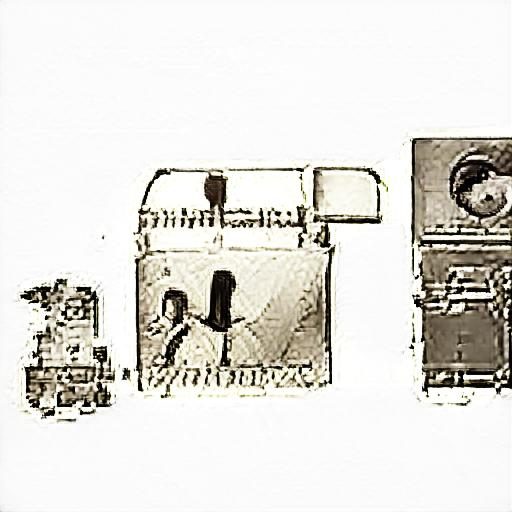

sample=7 iter=35 best: total=70.44 cos=70.44 reg=0.003 avg: total=73.41 cos=73.40 reg=0.006 std: total=1.84 cos=1.84 reg=0.003 1st=mask(0.75) 2nd=hair_spray(0.21) 3rd=guinea_pig(0.02) components: >=0.5:1, >=0.3:1, >=0.1:2
Best index: 33
took: 170 secs (4.74 sec/iter) on GPU 0: GeForce RTX 2080 Ti (UUID: GPU-2d41d8d9-3a41-69a8-0773-838021d51072)
took: 189 secs (4.74 sec/iter) on GPU 0: GeForce RTX 2080 Ti (UUID: GPU-2d41d8d9-3a41-69a8-0773-838021d51072)


In [17]:
for prompt in prompts:

    # seeding
    if seed == 0:
      seed = None

    # torch.manual_seed(np.random.randint(sys.maxsize))
    state = None if not seed else np.random.RandomState(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)

    # initialization
    eps = 1e-8
    if 'sigmoid' in gen_model:
      noise_size = channels*sideY*sideX
      noise_vector = np.random.rand(pop_size, noise_size).astype(np.float32)
      noise_vector = np.log((noise_vector+eps)/(1-noise_vector+eps))
    else:
      noise_vector = truncnorm.rvs(-2*truncation, 2*truncation, size=(pop_size, noise_size), random_state=state).astype(np.float32) #see https://github.com/tensorflow/hub/issues/214

      if initial_class.lower() == 'random class':
        class_vector = np.ones(shape=(pop_size, class_size), dtype=np.float32)*class_smoothing/999
        class_vector[0,np.random.randint(class_size)] = 1-class_smoothing
      elif initial_class.lower() == 'random dirichlet':
        class_vector = dirichlet.rvs([pop_size/class_size] * class_size, size=1, random_state=state).astype(np.float32)
      elif initial_class.lower() == 'random mix':
        class_vector = np.random.rand(pop_size, class_size).astype(np.float32)
      elif initial_class.lower() == 'random embeddings':
        class_vector = np.random.randn(pop_size, class_size).astype(np.float32)
      else:
        if initial_class.lower() == 'from prompt':
          initial_class = prompt
        try:
          class_vector = None
          class_vector = one_hot_from_names(initial_class, batch_size=pop_size)
          assert class_vector is not None
          class_vector = class_vector*(1-class_smoothing*class_size/(class_size-1))+class_smoothing/(class_size-1)
        except Exception as e:  
          print('Error: could not find initial_class. Try something else.')
          raise e

      if initial_class.lower() != 'random embeddings':
        class_vector = class_vector/np.sum(class_vector,axis=-1, keepdims=True)
        class_vector = np.log(class_vector+eps)
      initial_class_vector = class_vector[0]
      if initial_class.lower() == 'random mix':
        initial_class_vector = initial_class_vector*0-np.log(class_size)
      if initial_class.lower() == 'random embeddings':
        initial_class_vector = initial_class_vector*0
      class_vector = torch.tensor(class_vector, requires_grad='SGD' in optimizer or 'Adam' in optimizer, device='cuda')
      smoothed_ent = -torch.tensor(class_smoothing*np.log(class_smoothing/999+eps)+(1-class_smoothing)*np.log(1-class_smoothing+eps), dtype=torch.float32).cuda()
    noise_vector = torch.tensor(noise_vector, requires_grad='SGD' in optimizer or 'Adam' in optimizer, device='cuda')

    if 'SGD' in optimizer or 'Adam' in optimizer:
      params = [noise_vector]
      if optimize_class:
        params = params + [class_vector]
      if 'SGD' in optimizer:
        optim = torch.optim.SGD(params, lr=learning_rate, momentum=0.9)  
      else:
        optim = torch.optim.Adam(params, lr=learning_rate)

    tx = clip.tokenize(prompt)
    with torch.no_grad():
      target_clip = perceptor.encode_text(tx.cuda())

    nom = torchvision.transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
    if 'CMA' in optimizer:
      initial_vector = np.zeros(noise_size)
      bounds = None
      #if 'sigmoid' not in gen_model and not stochastic_truncation:
      #  bounds = [-2*truncation*np.ones(noise_size),2*truncation*np.ones(noise_size)]
      if optimize_class:
        initial_vector = np.hstack([initial_vector, initial_class_vector])
        #if not stochastic_truncation:
        #  bounds[0] = list(bounds[0]) + [None]*class_size
        #  bounds[1] = list(bounds[1]) + [None]*class_size
      cma_opts = {'popsize': pop_size, 'seed': np.nan, 'AdaptSigma': True, 'CMA_diagonal': True, 'CMA_active': False, 'CMA_elitist':False, 'bounds':bounds}
      cmaes = cma.CMAEvolutionStrategy(initial_vector, 1, inopts=cma_opts)

    # training
    sample_num = 0
    machine = !nvidia-smi -L
    start = time()

    for i in range(iterations):    
      if 'CMA' in optimizer:
        with torch.no_grad():
          cma_results = torch.tensor(cmaes.ask(), dtype=torch.float32).cuda()
          if optimize_class:
            noise_vector.data, class_vector.data = torch.split_with_sizes(cma_results, (noise_size, class_size), dim=-1)
            class_vector.data = class_vector.data
          else:
            noise_vector.data = cma_results      
      if 'SGD' in optimizer or 'Adam' in optimizer:
        losses = ascend_txt(i, grad_step=True, show_save='CMA' not in optimizer)
        assert noise_vector.requires_grad and noise_vector.is_leaf and (not optimize_class or class_vector.requires_grad and class_vector.is_leaf), (noise_vector.requires_grad, noise_vector.is_leaf, class_vector.requires_grad, class_vector.is_leaf)
      if 'CMA' in optimizer:
        with torch.no_grad():
          losses = ascend_txt(i, show_save=True)
          if optimize_class:
            vectors = torch.cat([noise_vector,class_vector], dim=1)
          else:
            vectors = noise_vector
          cmaes.tell(vectors.cpu().numpy(), losses)
      if i == iterations-1 or i % save_every == 0:
        print('took: %d secs (%.2f sec/iter) on %s'%(time()-start,(time()-start)/(i+1), machine[0]))

    newdir = outpath[:-1]+"_"+datetime.datetime.now().strftime('%Y%m%d_%H%M%S')
    !mv $outpath $newdir
    !mkdir -p $outpath

# Notes


Based on SIREN+CLIP Colabs by: [@advadnoun](https://twitter.com/advadnoun), [@norod78](https://twitter.com/norod78)

Other CLIP notebooks: [OpenAI tutorial](https://colab.research.google.com/github/openai/clip/blob/master/Interacting_with_CLIP.ipynb), [SIREN by @advadnoun](https://colab.research.google.com/drive/1FoHdqoqKntliaQKnMoNs3yn5EALqWtvP), [SIREN by @norod78](https://colab.research.google.com/drive/1K1vfpTEvAmxW2rnhAaALRVyis8EiLOnD), [BigGAN by @advadnoun](https://colab.research.google.com/drive/1NCceX2mbiKOSlAd_o7IU7nA9UskKN5WR), [BigGAN by @eyaler](j.mp/bigclip), [BigGAN by @tg_bomze](https://colab.research.google.com/github/tg-bomze/collection-of-notebooks/blob/master/Text2Image_v2.ipynb), [BigGAN using big-sleep library by @lucidrains](https://colab.research.google.com/drive/1MEWKbm-driRNF8PrU7ogS5o3se-ePyPb), [BigGAN story hallucinator by @bonkerfield](https://colab.research.google.com/drive/1jF8pyZ7uaNYbk9ZiVdxTOajkp8kbmkLK), [StyleGAN2-ADA Anime by @nagolinc](https://colab.research.google.com/github/nagolinc/notebooks/blob/main/TADNE_and_CLIP.ipynb) [v2](https://colab.research.google.com/github/nagolinc/notebooks/blob/main/CLIP_%2B_TADNE_(pytorch)_v2.ipynb)

Using the works:

https://github.com/openai/CLIP

https://tfhub.dev/deepmind/biggan-deep-512

https://github.com/huggingface/pytorch-pretrained-BigGAN

http://www.aiartonline.com/design-2019/eyal-gruss (WanderGAN)

For a curated list of more online generative tools see: [j.mp/generativetools](https://j.mp/generativetools)


## OLDER VERSION

BIGCLIP [j.mp/bigclip](https://j.mp/bigclip) 


# Leftovers

# ~0. One-Time Setup~

(UPDATE: all of this has been moved to the docker image on gitlab 2021-02)

In [18]:
# !nvidia-smi -L

# import subprocess

# CUDA_version = [s for s in subprocess.check_output(["nvcc", "--version"]).decode("UTF-8").split(", ") if s.startswith("release")][0].split(" ")[-1]
# print("CUDA version:", CUDA_version)

# if CUDA_version == "10.0":
#     torch_version_suffix = "+cu101"
# #     torch_version_suffix = "+cu100"
# elif CUDA_version == "10.1":
#     torch_version_suffix = "+cu101"
# elif CUDA_version == "10.2":
#     torch_version_suffix = ""
# else:
#     torch_version_suffix = "+cu110"

# !pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex

In [19]:
# !pip install pytorch-pretrained-biggan
# !pip install nltk
# !pip install cma

In [20]:
# !sudo apt-get install -y ffmpeg

Install code repo for CLIP:

In [21]:
# !git clone --depth 1 https://github.com/openai/CLIP